<div class="alert alert-danger">

# 名前欄

</div>

以下に名前と学籍番号(STUDENT_ID)の入力をして下さい。

例)
```python
FAMILY_NAME = "Yamaguchi"# 姓をローマ字で入力
FIRST_NAME = "Daisuki"   #  名をローマ字で入力
USER = "a11yamaguchi"    # 公式メールアドレスのユーザ名
STUDENT_ID = "99999" # 学籍番号
```

FAMILY_NAME = "Fujimura"  # 姓をローマ字で入力
FIRST_NAME = "Soshi"  #  名をローマ字で入力
USER = "i15fujimura1s"  # 公式メールアドレスのユーザ名
STUDENT_ID = "15232"  # 99999 等と省略なしで入力

<div class="alert alert-danger">

# 提出方法(高専の皆さんへ)

</div>

以下のように**ディレクトリ(フォルダ)名を変更して提出**しましょう。
```python
元のディレクトリ名-学籍番号-名字(ローマ字)
```
例えば，元のディレクトリ名が`01-basic/`, 学籍番号が`99999`,名字が`Yamaguchi`の場合は以下になります。
```python
01-basic-99999-Yamaguchi/
```

<div class="alert alert-danger">

# 注意

</div>


- 以下の説明文を読み， 内容を納得できるように自分で試しなさい。
- **「# このセルで試してみよう」**, **「# このセルで動作確認をしよう」**と書かれているセルは自由に使って構いません。
- 必要に応じてセルを増やしても構いません。役立ちそうな情報もメモしておくと，今後プログラムを組む上で便利です。
- 表題等には適宜教科書のページを書いてあります。詳しい説明は教科書を参照しなさい。

<div class="alert alert-danger">

## 設問と解答用セル
    
</div>   

"**Q.**" から始まる設問に対する解答は必ず入力しなさい。解答用セルには以下のように表示される。

```python
# YOUR CODE HERE
raise NotImplementedError()
```

**注意**

- <span class="mark">raise NotImplementedError()の一行は**必ず消去**して</span>，<span class="mark"># YOUR CODE HERE の下に解答</span>を書くこと。
- <span class="mark">\# YOUR CODE HERE の一行は**消さない**</span>こと。どこに解答を書くべきかがわからなくなることがあります。
- なんらかの演算をしたり，命令文を作ったときは，その**結果が予想通りか否かを必ず確認しなさい**

<div class="alert alert-danger">

## 評価用セル
    
</div>

- **「評価用セル」と書かれているセルは採点のためのセル**です。
- **評価用コードが一部表示されている場合，それを実行すると課題の実行結果の確認**をできます。
- **表示されていない評価用コードも**あります。

<div class="alert alert-danger">

## 課題提出前の注意
    
</div>   

**[重要]** 以下の手順で，全ての課題が正常に動作するか確認してから提出しましょう。

1.  メニューバーの"Kernel"をクリック後，"Restart"を選択
2. メニューバーの"Cell"を，"Run All"を選択

In [1]:
# このセルは自動評価を行うための命令です。内容は無視して，実行(Shift-Enter)のみをしてください。
#%%writefile unittests.py
#%load unittests.py
%run unittests.py

<div class="alert alert-success">

# MDPGridworld

</div>

- レポート課題の準備のための課題シートです。

## `MDPGridworld-v1`:

- [openAI Gym](https://gym.openai.com/)準拠のモジュール。迷路等をデザインして強化学習環境として利用できる。
- ソースコードは[こちら](https://github.com/jnishii/gridworld-gym)。([IRLL/reinforcement_learning_class](https://github.com/IRLL/reinforcement_learning_class/tree/master/gym/envs)のものを改変したもの)

MDPGridworldのモジュールの読み込みは次セルを実行

In [2]:
import gym

env = gym.make("MDPGridworld-v1")

## 状態と行動

### 状態(state)
エージェントは，自分がどの部屋にいるか(部屋ID)を状態(state)の情報として知ることができる。
各部屋の配置および，状態(部屋ID)は以下の通り。

In [3]:
env.show_info()

[Map and Cell IDs]
+---+---+---+---+---+---+---+---+    +---+---+---+---+---+---+---+---+
|   |   |   | # |   |   |   | G |    |  0|  1|  2|  3|  4|  5|  6|  7|
+---+---+---+---+---+---+---+---+    +---+---+---+---+---+---+---+---+
|   | # |   |   |   |   | # |   |    |  8|  9| 10| 11| 12| 13| 14| 15|
+---+---+---+---+---+---+---+---+    +---+---+---+---+---+---+---+---+
|   | # |   |   |   |   | # |   |    | 16| 17| 18| 19| 20| 21| 22| 23|
+---+---+---+---+---+---+---+---+    +---+---+---+---+---+---+---+---+
|   | # | # | # | # | # | # |   |    | 24| 25| 26| 27| 28| 29| 30| 31|
+---+---+---+---+---+---+---+---+    +---+---+---+---+---+---+---+---+
|   | # |   |   |   |   | F |   |    | 32| 33| 34| 35| 36| 37| 38| 39|
+---+---+---+---+---+---+---+---+    +---+---+---+---+---+---+---+---+
|   | # |   |   |   |   | F |   |    | 40| 41| 42| 43| 44| 45| 46| 47|
+---+---+---+---+---+---+---+---+    +---+---+---+---+---+---+---+---+
|   | # |   |   |   |   | F |   |    | 48| 49| 50| 51| 52|

### 行動(action)

選択できる行動は以下に示す0から3の4通り。もし壁に向かって移動しようとしたら，その場に留まる。
```python
0 - Northに移動
1 - Southに移動
2 - Westに移動
3 - Eastに移動
```

### エピソード(episode)とエージェントの目的

- **1エピソード**: スタート(S)から，ゴール(G)もしくはFの部屋に到達するまで
- **エージェントの目的**: 1エピソード間にできるだけ多くの報酬を得ること

## openAI gymのインタンス変数・関数
### 状態に関する情報を格納するインスタンス変数
- `gym.observation_space` : 状態に関する情報
- `gym.observation_space.n`: 状態数

次セルでは各インスタンス変数の値を確認している。

In [4]:
print(env.observation_space)
print(env.observation_space.n)

Discrete(64)
64


実行結果より，状態が離散的な64個の値(0から63まで)をとることがわかる。

### 行動に関するインスタンス変数
- `gym.action_space`: 行動に関する情報
- `gym.action_space.n`: 行動数
- `gym.action_space.sample()`: エージェントがとりうる行動を一つランダムに選択して返す

各インスタンス変数の値は以下の通り。

In [5]:
print(env.action_space)
print(env.action_space.n)
print(env.action_space.sample())

Discrete(4)
4
2


実行結果より，とりうる行動は離散的な4個の値(0から3まで)で表現されていることがわかる。また，`env.action_space.sample()`の返り値は，この４個の値からランダムに選ばれている。

**Q.** 上述の`MDPGridWorld-v1`環境には，状態と行動の組み合わせは全部何通りあるか? その値を変数`ans`に代入しなさい。

In [6]:
# YOUR CODE HERE
ans = 6*6*4 + 6*4*3 + 4*2

In [7]:
# 評価用セル

### その他の情報

`gym.spec.max_episode_steps`
    - 1エピソード内の最大ステップ数
    - ゴールに到達するか，もしくはこのステップ数に達したところでエピソードは終了
**Q.** 上記のインスタンス変数の値を確認しなさい。

In [8]:
print(env.spec.max_episode_steps)

200


### 環境クラスのインスタンス・メソッド

- `env.reset()`: 初期化。エージェントの位置はSになる。
- `env.step(action)`: 
    - 引数:
        - `action` : エージェントのとる行動
    - 返り値:
        - `next_state` : actionによる状態遷移後の状態
        - `reward` : actionにより得た報酬
        - `terminal` : エピソード終了時にTrue, それ以外はFalse
        - `info` : 行動actionによって，状態sから次の状態next_stateに遷移する確率(この演習では使わない)

次セルで`env.reset()`を実行し，適当な`action`を用いて`env.step()`による状態遷移を行い，`action`に応じた適切な状態，報酬値，終了状態が得られることを確認しなさい。

In [9]:
# 以下のactionを変更し，actionに応じたいろいろな返り値が得られていることを確認しなさい。
env.reset()
action = 0
next_state, reward, terminal, info = env.step(action)
# terminal is a return value of the environment's step method
print(next_state, reward, terminal, info)

48 -3 False {'prob': 1.0}


<div class="alert alert-success">

# MDPGridWorldを動き回る

</div>

## ランダムアクション
前回の課題(rooms課題)で作ったクラス`Fool`および，`play_env()`の修正版を用いて`MDPGridWorld-v1`の環境を動き回るプログラムを作る。


**Q(1)** 以前の課題(rooms課題)で作ったクラス`Fool`の定義を以下に入力しなさい。

In [10]:
# このセルでは，実行に必要なモジュールの読み込みを行う。
# ここに書かれているもの以外に必要なものがあれば，適宜追加すること。
import numpy as np
import random as ra
import matplotlib.pyplot as plt

In [11]:
# class Foolの定義をこのセルに入力する
# YOUR CODE HERE
class Fool:
    def __init__(self, action_list, action="random"):
        self.action_list = action_list
        if action in action_list:
            self.a = action
        else:
            self.a = "random"
    
    def get_action(self, s):
        if self.a == "random":
            return(ra.choice(self.action_list))
        else:
            return(self.a)

In [12]:
# 評価用セル

**Q(2)** 以前の課題(rooms課題シート)で作った`play_env()`を以下のよう修正しなさい。

**変更点**
1. 引数`max_step`(1episode内の最大ステップ数)は廃止。`play_env()`内での処理には，代わりに`env.spec.max_episode_steps` の値を用いること。
2. 引数`s0`も廃止
3. 関数`env.step(action)`の返り値はこれまで`state,reward,terminal`の3つだったが，openAI gymでは4つめに`info`が加わる。ただ，この引数の内容を使うことはほとんど無いので，以下のように返り値を受け取って，4つ目の引数は無視する。
```python
s,r,terminal,_=env.step(action) # 返り値の第4要素は'_'という名前の変数で受け取っている。
```
`play_env()`を呼び出して，ランダム選択エージェント`Fool`が`FronzenLake-v1`の環境を動き回る実行例は，解答欄の次のセルにある。

In [13]:
def play_env(env, agent, learning=True, max_episode=30, render_step=20, verbose=False):
    # YOUR CODE HERE
    history_step = [0] * max_episode
    history_score = [0] * max_episode

    # 各エピソードの総報酬は変数scoreに格納する。そのための命令文は以下のどこかに追加する
    count = 0
    for n_episode in range(max_episode):
        score = 0
        s = env.reset()
        for t in range(env.spec.max_episode_steps):
            count += 1
            # ここに，verbose==Trueの場合かつ，render_step回のエピソード実行毎に
            # env.render()を実行する命令文を書く
            if verbose and count % render_step == 0:
                env.render()
            action = agent.get_action(s)
            s1 = s
            s,r,terminal,_ = env.step(action)
            if learning: agent.learning(s1, action, r, s, terminal)
            if terminal: break # <= if文を1行で書いてみた
        score += r

        if verbose: 
            # ここに，render_step回のエピソード実行毎((n_episode%render_step==0 の時)に
            # env.render()を実行する命令文を書く
            if count % render_step == 0:
                env.render()
            print("Episode {} finished after {} timesteps with {} return".format(n_episode,t+1,score)) #時間tの表示は0からではなく，1からにする

        # history_step の第n_episode要素に，エピソード終了時のt+1を代入する命令文を追加
        history_step[n_episode] = t + 1
        # history_score の第n_episode要素に，エピソード終了時のscoreを代入する命令文を追加
        history_score[n_episode] = score

    return(history_step,history_score)

In [14]:
# `play_env()`を呼び出して，ランダム選択エージェントFoolが`MDPGridworld-v1`の環境を動き回る実行例。
# 引数をいろいろと変えて，動作検証をしなさい。

env = gym.make("MDPGridworld-v1")
action_list = list(range(env.action_space.n))
step, score = play_env(
    env,
    agent=Fool(action_list),
    learning=False,
    max_episode=1,
    render_step=1,
    verbose=True,
)

+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+

+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+
  (East)
+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+
  (East)
+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+
  (North)
+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+
  (North)
+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+
  (East)
+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+
  (North)
+--------+
|   |   G|
| |    | |
| |    | |
| |||||| |
| |    F |
| |    F |
| |    F |
|S       |
+--------+
  (North)
+--------+
|   |   G|
| |    | |
| |    | |
| ||||||

In [15]:
# 評価用セル(Foolを用いた動作確認。demo_env()と同様の動作確認)
env = gym.make("MDPGridworld-v1")
action_list = list(range(env.action_space.n))


def test_mdpgrid(agent, verbose=True):
    return play_env(
        env=env,
        agent=agent,
        learning=False,
        max_episode=1,
        render_step=1,
        verbose=verbose,
    )


result = [test_mdpgrid(Fool(action_list, 0), verbose=False) for i in range(2)]
eq_(result, ([([200], [-600]), ([200], [-600])]))
result = [test_mdpgrid(Fool(action_list, 1), verbose=False) for i in range(2)]
eq_(result, ([([200], [-600]), ([200], [-600])]))
result = test_mdpgrid(Fool(action_list, 2), verbose=False)
eq_(result, ([200], [-600]))
result = test_mdpgrid(Fool(action_list, 3), verbose=False)
eq_(result, ([200], [-600]))
result = [test_mdpgrid(Fool(action_list, "random"), verbose=False) for i in range(10)]
result2 = [test_mdpgrid(Fool(action_list, "random"), verbose=False) for i in range(10)]
assert_not_equal(result, result2)

AssertionError: [([200], [-3]), ([200], [-3])] != [([200], [-600]), ([200], [-600])]

以前の課題(rooms課題)で作った関数`plot_history()`を使えば，エピソードごとのステップ数や総得点の履歴のグラフ表示もできる。

**Q.** 次のセルにclass課題で作った`plot_history()`を入力して動作確認を行い，必要に応じて修正をしなさい。動作確認のための実行例は解答欄の次のセルにある。

注意)
- class課題で作った関数`plot_history()`で定義した`ax1`,`ax2`の変数名は変更しないこと。
- 返り値も`ax1, ax2`のまま変更しないこと。

In [16]:
import matplotlib.pyplot as plt


# YOUR CODE HERE
import numpy as np

def plot_history(step, score):
    fig = plt.figure(figsize=(7, 5))
    plt.rcParams["font.size"] = 16

    ax1 = fig.add_subplot(211)  # こちらにステップ数`step`を描画
    ax2 = fig.add_subplot(212)  # こちらに総報酬`score`を描画

    dom = np.arange(0, len(step), 1)
    
    ax1.plot(dom, step, label="step")
    ax1.set_xlim(0, len(step))
    ax1.grid(True)
    ax1.set_ylabel("step")
    
    ax2.plot(dom, score, label="return")
    ax2.set_xlim(0, len(step))
    ax2.grid(True)
    ax2.set_ylabel("return")
    ax2.set_xlabel("episode")

    plt.tight_layout()  # タイトルやラベルが重ならないように配置調整し，生成されているFigureを描画
    
    return ax1, ax2

(<matplotlib.axes._subplots.AxesSubplot at 0x7fababc6e0b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faba9bac320>)

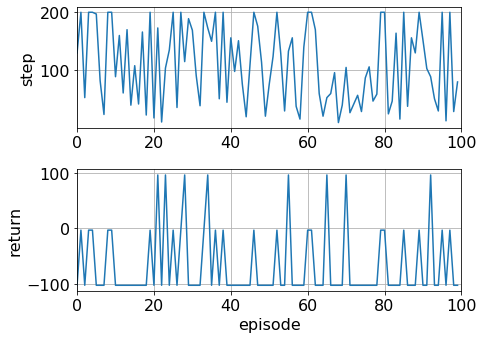

In [17]:
# 実行例
# 引数をいろいろと変えて，動作検証をしなさい。
env = gym.make("MDPGridworld-v1")
step, score = play_env(
    env,
    agent=Fool(action_list),
    learning=False,  # Foolは学習しない
    max_episode=100,
    verbose=False,
)
plot_history(step, score)

In [18]:
# 評価用セル

## グラフのファイル保存

前問のブログラムの場合，`plt.tight_layout()`の直後に以下の命令を追加すると**グラフをファイル保存**できる。
```python
plt.savefig('figure.png')
```
保存されたファイルは，課題シートの一覧画面で確認やダウンロードをできる。

## Q学習
**Q.** 以前の課題(rooms)で作ったクラス`Qlearner`と，このシートで定義済みの関数`play_env()`を使えば，MDPGridWorld環境に対する学習もできるはずである。次のセルに`Qlearner`の定義を入力して動作確認を行い，必要に応じて修正しなさい。

実行例は解答欄の次のセルにある。

In [19]:
# 以下にclass QLearnerの定義を書きなさい。(必要ならindex_list()等, Qlearnerの実行に必要な関数も書きなさい)
# YOUR CODE HERE
# このセルにclass Qlearnerの定義を入力しなさい
import random as ra

def index_list(L, value):
    return [i for i in range(len(L)) if L[i]==value]

class Qlearner:
    def __init__(self, action_list, epsilon=0.1, alpha=0.2, gamma=0.9, q0=0):
        self.action_list = action_list
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q0 = q0
        self.Q = {}
    
    def reset(self):
        self.Q = {}
    
    def get_q(self, s, a):
        return(self.Q.get((s, a), self.q0))
    
    def get_maxQ(self, s):
        qs = [self.get_q(s, a) for a in self.action_list]
        maxQ = max(qs)
        indices = index_list(qs, maxQ)
        return(maxQ, len(indices), indices)
    
    def get_action(self, s):
        if ra.random() < self.epsilon:
            return(ra.choice(self.action_list))
        maxQ, n_indices, indices = self.get_maxQ(s)
        if n_indices == 1:
            index = indices[0]
        else:
            index = ra.choice(indices)
        return(self.action_list[index])
    
    def learning(self, s1, a1, r, s2, terminal=False):
        q1 = self.get_q(s1, a1)
        q2 = 0
        if not terminal:
            q2 = self.get_maxQ(s2)[0]
        self.Q[(s1, a1)] = q1 + self.alpha * (r + self.gamma * q2 - q1)

In [30]:

action_list = list(range(4))
agent = Qlearner(action_list)

In [31]:
# 評価用セル

## 学習の継続
Q学習エージェント`agent`の学習結果(Q値)は，関数`play_env()`を終了しても変数`agent`に保持される。したがって，上のセルの実行後に，以下のように`play_env()`を再度実行すれば，上記の学習の続きを行うことができる。
```python
step,score=play_env(env, agent=agent, max_episode=100, verbose=False)
plot_history(step,score)
```
**学習結果(Q値)を未学習な状態に戻したいとき**は，`agent`を再定義するか，`agent.reset()`を実行する。

**Q.** 実際に`play_env()`を何度か実行してみて，未学習の状態よりも，パフォーマンスが良くなっていくことを確認しなさい。

(<matplotlib.axes._subplots.AxesSubplot at 0x7faba82efc18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faba82b8978>)

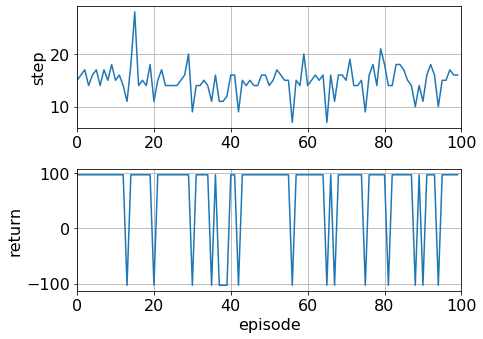

In [37]:
step, score = play_env(env, agent=agent, max_episode=100, verbose=False)
plot_history(step, score)

**Q.** Q学習エージェントは学習により，どのようなQ値を獲得しただろうか。可視化を試みよ。例えば，Q値を格納している辞書`agent.Q`の内容を見ると，獲得したQ値の一覧を確認できる。以下は，可視化のサンプルプログラムだが，このサンプルプログラムをレポート等に利用したい場合には，座標軸の値やタイトルを加え，また，表示内容に関する十分な解説を加えて使うこと。プログラムの内容を理解しないまま，図だけ見て意味を判断して使うと，勘違いをすることがあるので要注意。

+--------+
|>>v^>>>^|
|^^>>>^^^|
|^^^<^^^^|
|^^^^^^^^|
|^^^^<<^^|
|<^<><v^^|
|v^>vvv^^|
|>>>>>>>^|
+--------+


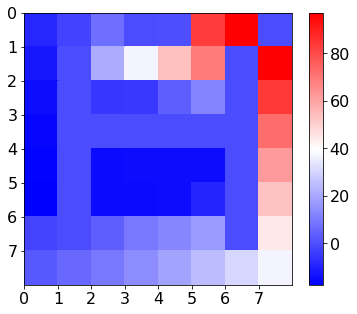

In [38]:
def show_Q(agent, n_col=8):
    Qarray = []
    Qrow = []
    nCol = n_col
    print("+--------+")
    print("|", end="")
    for s in range(env.observation_space.n):
        q = [agent.get_q(s, a) for a in range(env.action_space.n)]
        Qrow.append(max(q))
        argmaxQ = q.index(max(q))  # Q値が最大になるaのうち, indexが最小のもの
        print("{}".format(["^", "v", "<", ">"][argmaxQ]), end="")
        if (s + 1) % nCol == 0:
            print("|")
            if s != env.observation_space.n - 1:
                print("|", end="")
            Qarray.append(Qrow)
            Qrow = []
    print("+--------+")

    fig = plt.figure(figsize=(6, 5))  # グラフを生成
    ax = fig.subplots()  # 座標軸を1つ生成してaxに代入
    ax.invert_yaxis()    # y軸を上下ひっくり返したいとき

    tick = range(0, 8, 1)
    ax.set_xticks(tick)
    ax.set_yticks(tick)

    map = ax.pcolor(Qarray, cmap="bwr")  # 数値データからカラーデータを作成 cmapの値により配色変化
    fig.colorbar(map, ax=ax)  # カラーデータと軸データを使ってグラフデータ生成

    plt.show()  # 表示(生成されているグラフデータを画面表示)


show_Q(agent)

Q. `class Qlearner`の継承クラスとして，`class SARSAlearner`を作り，学習のためのインスタンス関数`learning()`の内容をSARSA学習にしなさい。

In [48]:
# このセルにクラス定義を入力する
class SARSAlearner(Qlearner):
    def learning(self, s1, a1, r, s2, terminal=False):
        """
        Q(s1, a1) <= Q(s1, a1) + alpha * (r + gamma*Q(s2,a') - Q(s1,a1)) # 通常時
        Q(s1, a1) <= Q(s1, a1) + alpha * (r - Q(s1,a1)) # エピソード終了時
        a'は，状態s'において行動選択ポリシーに従い選択される行動(get_action()で取得)
        """
        # YOUR CODE HERE
        q1 = self.get_q(s1, a1)
        q2 = 0
        if not terminal: q2 = self.get_maxQ(s2)[0]
        self.Q[(s1, a1)] = q1 + self.alpha * (r + self.gamma * q2 - q1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7faba353ccf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faba34af208>)

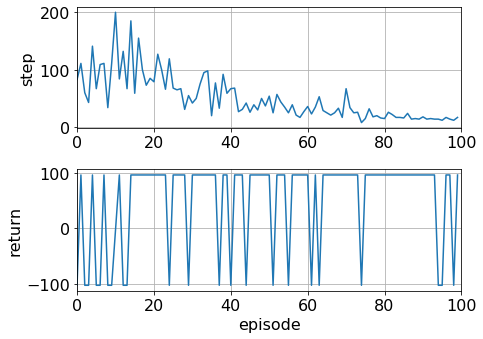

In [57]:
# このセルで動作確認をしよう
# SARSAlearner + play_env() + MGPGridWorld の学習プログラム

agent = SARSAlearner(action_list)  # 学習エージェント生成
step, score = play_env(env=env, agent=agent, max_episode=100, verbose=False)
plot_history(step, score)

In [58]:
# 評価用セル
class SARSAlearnerTest(SARSAlearner):
    def set_action(self, a=0):
        self.def_action = a

    def get_action(self, s):
        return self.def_action


env = gym.make("MDPGridworld-v1")
action_list = list(range(env.action_space.n))  # action_list取得
agent = SARSAlearnerTest(action_list)  # 学習エージェント生成

# test1
agent.set_action(a=0)
step, score = play_env(env=env, agent=agent, max_episode=5, verbose=False)
ans_Q = {
    (56, 0): -2.882376096,
    (48, 0): -2.882376096,
    (40, 0): -2.882376096,
    (32, 0): -2.9070494918446594,
    (24, 0): -3.3473247916120967,
    (16, 0): -6.290059022035771,
    (8, 0): -15.00201805496299,
    (0, 0): -24.509190126958917,
}
eq_(agent.Q, ans_Q)
# test2

AssertionError: {(56, 0): -2.01696, (48, 0): -2.01696, (40, 0): -2.01696, (32, 0): -2.01696, (24, 0): -2.01696, (16, 0): -2.01696, (8, 0): -2.01696, (0, 0): -2.999999999999999} != {(56, 0): -2.882376096, (48, 0): -2.882376096, (40, 0): -2.882376096, (32, 0): -2.9070494918446594, (24, 0): -3.3473247916120967, (16, 0): -6.290059022035771, (8, 0): -15.00201805496299, (0, 0): -24.509190126958917}

In [59]:
# このセルは，自動採点の際に以降のセルを実行しないための命令です。無視してください。
raise SystemExit("Stop right here!")

SystemExit: Stop right here!

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<div class="alert alert-success">
    
# ここから下には，自由にセルを作成して，いろいろと動作確認して構いません。

</div>